In [1]:
!pip install qiskit qiskit_aer pylatexenc --quiet

import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile, ClassicalRegister, QuantumRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 62.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 69.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 75.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.0 MB/s eta 0:00:00


In [2]:
def qft_circuit(n):
    qc = QuantumCircuit(n)
    for j in range(n):
        qc.h(j)
        for k in range(2, n-j+1):
            qc.cp(np.pi/2**(k-1), j+k-1, j)
    for i in range(n//2):
        qc.swap(i, n-i-1)
    return qc


In [3]:
def inverse_qft_circuit(n):
    qc = QuantumCircuit(n)
    for i in range(n//2):
        qc.swap(i, n-i-1)
    for j in range(n-1, -1, -1):
        for k in range(n-j, 1, -1):
            qc.cp(-np.pi/2**(k-1), j+k-1, j)
        qc.h(j)
    return qc


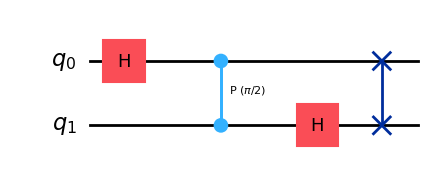

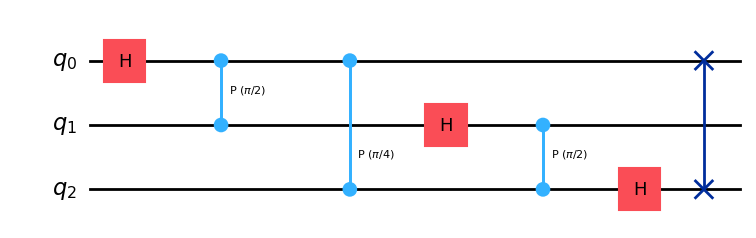

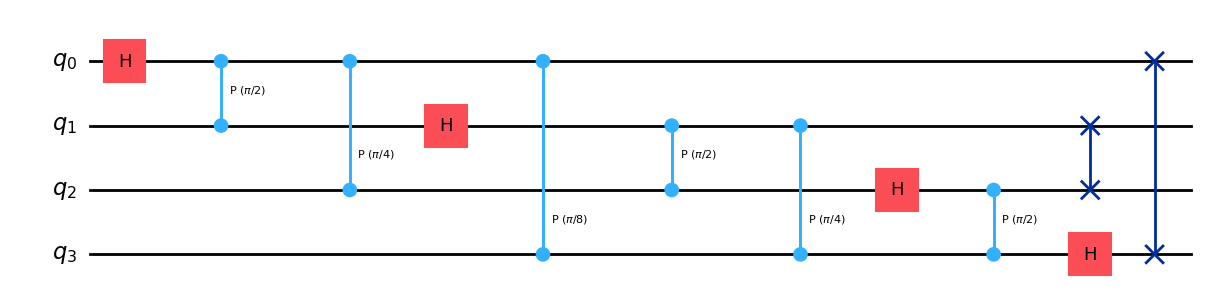

In [4]:
for n in [2,3,4]:
    qc = qft_circuit(n)
    display(qc.draw('mpl'))


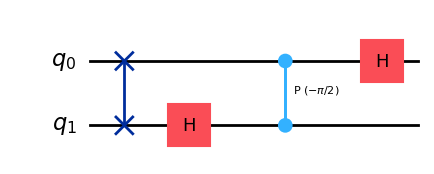

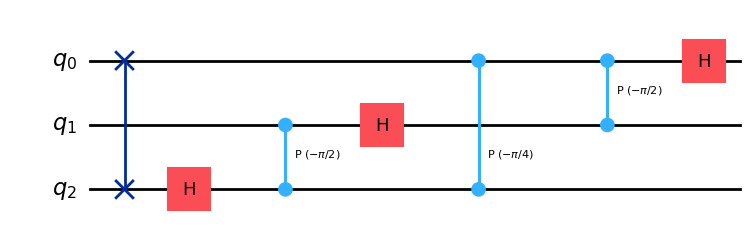

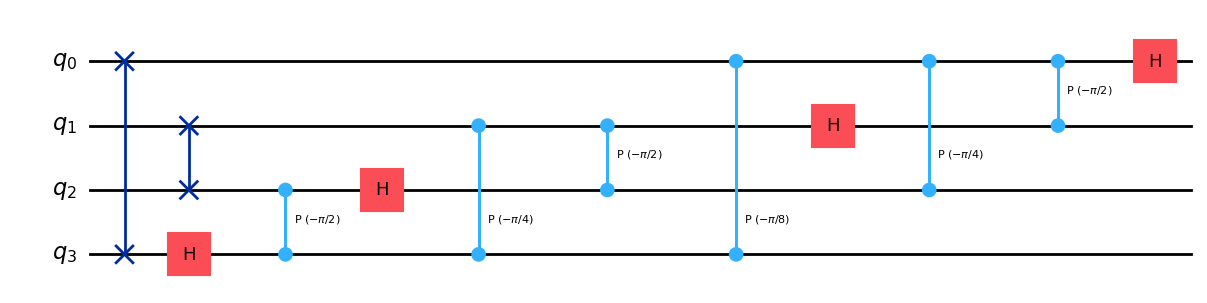

In [5]:
for n in [2,3,4]:
    iqc = inverse_qft_circuit(n)
    display(iqc.draw('mpl'))


In [6]:
def phase_estimation(n_count, theta):
    qc = QuantumCircuit(n_count+1, n_count)
    for q in range(n_count):
        qc.h(q)
    for q in range(n_count):
        qc.cp(2*np.pi*theta*(2**q), q, n_count)
    qc.append(inverse_qft_circuit(n_count), range(n_count))
    qc.measure(range(n_count), range(n_count))
    return qc


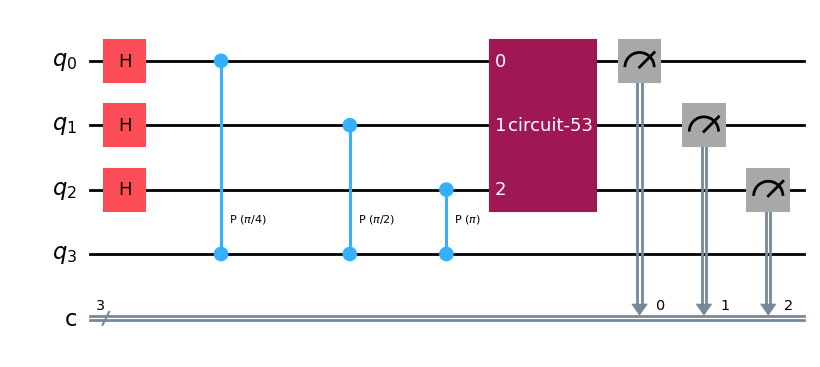

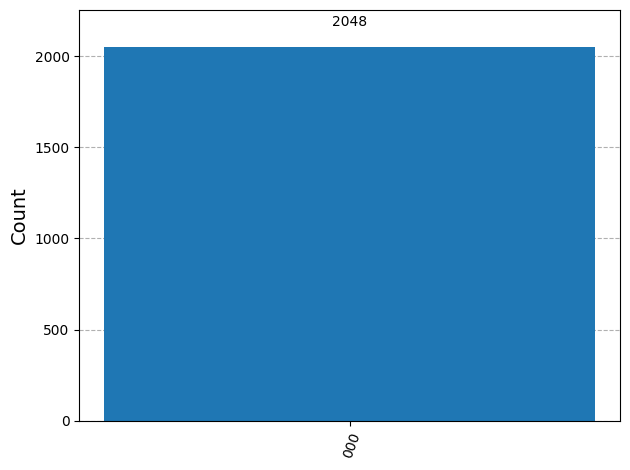

In [7]:
qc_pe = phase_estimation(3, 0.125)
sim = AerSimulator()
tqc = transpile(qc_pe, sim)
res = sim.run(tqc, shots=2048).result()
counts = res.get_counts()
display(qc_pe.draw('mpl'))
display(plot_histogram(counts))


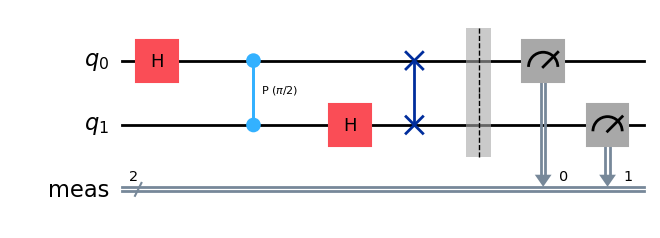

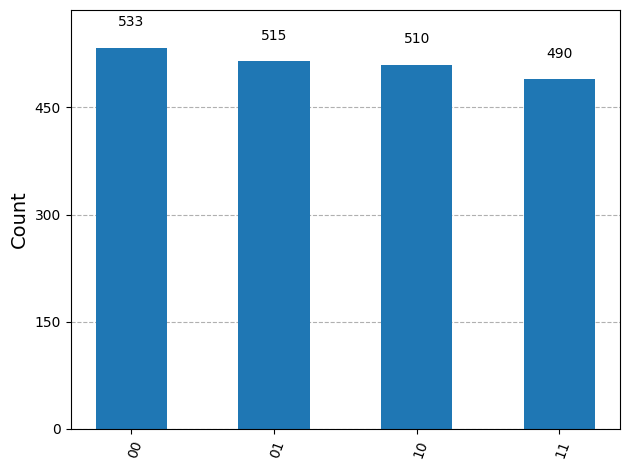

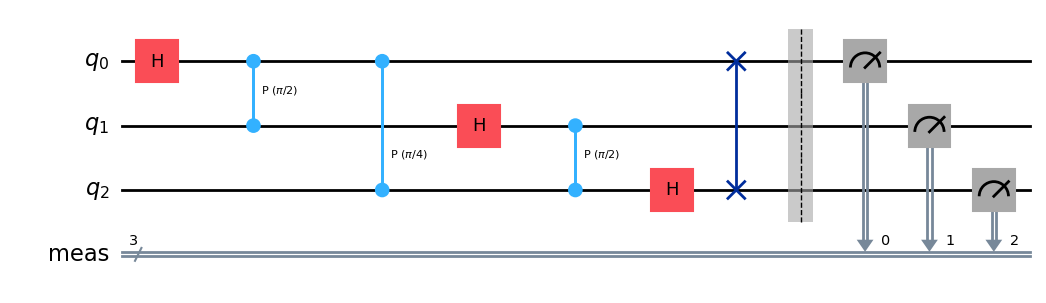

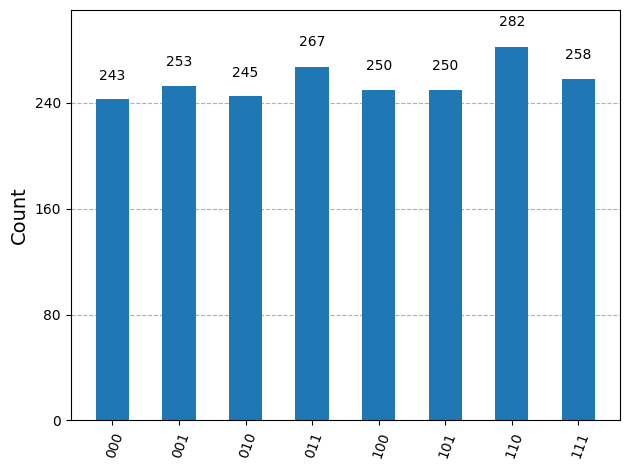

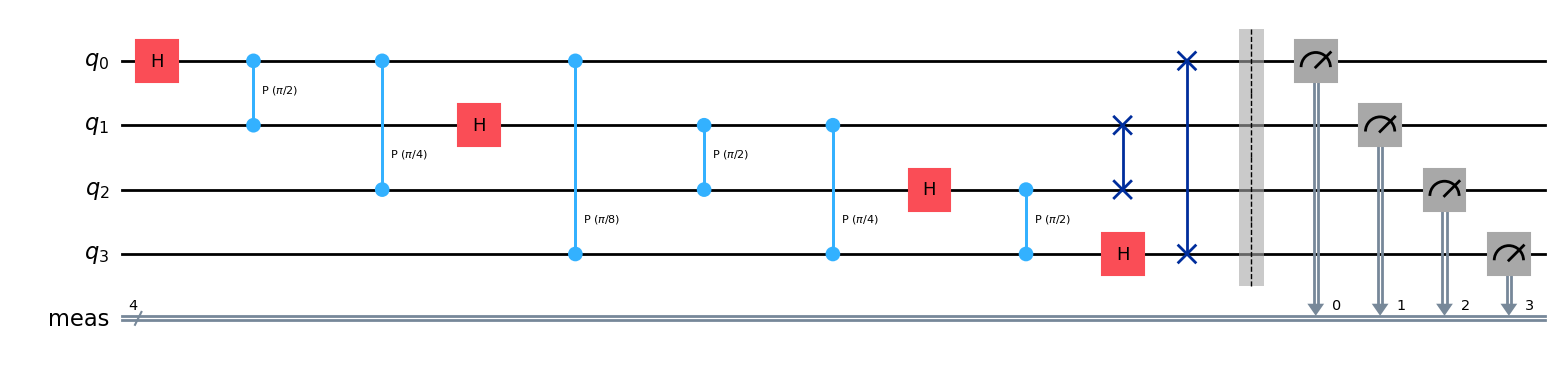

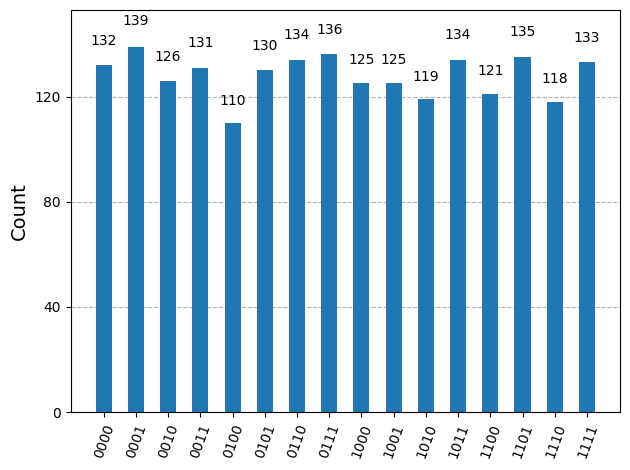

In [8]:
def measure_qft(n):
    qc = qft_circuit(n)
    qc.measure_all()
    sim = AerSimulator()
    tqc = transpile(qc, sim)
    res = sim.run(tqc, shots=2048).result()
    return qc, res.get_counts()
for n in [2,3,4]:
    qc, counts = measure_qft(n)
    display(qc.draw('mpl'))
    display(plot_histogram(counts))
